In [1]:
import tensorflow as tf
import os
from tensorflow import keras
import keras_preprocessing as kp
import cv2
import imghdr

#https://www.kaggle.com/code/kausthubkannan/ai-human-art-classification-mobilenetv2-91/notebook

In [2]:
tf.get_logger().setLevel('INFO')

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

In [4]:

# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)


tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [5]:
'''gpu_memory_fraction = 0.8  # Use 80% of the available GPU memory
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth'''

"gpu_memory_fraction = 0.8  # Use 80% of the available GPU memory\ngpus = tf.config.experimental.list_physical_devices('GPU')\nif gpus:\n    for gpu in gpus:\n        tf.config.experimental.set_memory_growth"

In [6]:
os.listdir('AIandRealArt/train/')
data_loc = 'AIandRealArt/train/'

In [7]:
"""imgtypes = ['jpg','png','jpeg']
for iclass in os.listdir(data_loc):
    for image in os.listdir(os.path.join(data_loc,iclass)):
        image_path = os.path.join(data_loc,iclass,image)
        try:
            img = cv2.imread(image_path)
            typ = imghdr.what(image_path)
            if typ not in imgtypes:
                os.remove(image_path)
                print('Issue 1')
        except Exception as e:
            print("Issue")"""

'imgtypes = [\'jpg\',\'png\',\'jpeg\']\nfor iclass in os.listdir(data_loc):\n    for image in os.listdir(os.path.join(data_loc,iclass)):\n        image_path = os.path.join(data_loc,iclass,image)\n        try:\n            img = cv2.imread(image_path)\n            typ = imghdr.what(image_path)\n            if typ not in imgtypes:\n                os.remove(image_path)\n                print(\'Issue 1\')\n        except Exception as e:\n            print("Issue")'

In [8]:
import numpy as np
from matplotlib import  pyplot as plt

In [9]:
data = tf.keras.preprocessing.image_dataset_from_directory(data_loc,shuffle =True)

Found 18618 files belonging to 2 classes.


In [10]:
data_it = data.as_numpy_iterator()

In [11]:
batch = data_it.next()

In [12]:
batch[0].shape

(32, 256, 256, 3)

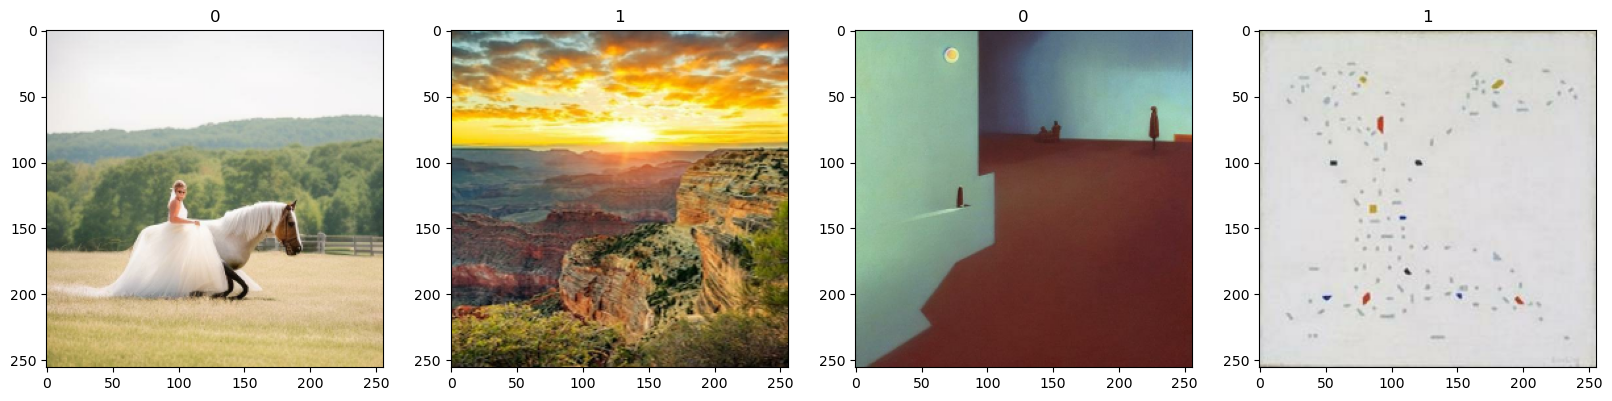

In [13]:
fig, ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

1 - Real
0 - AI

In [14]:
data_scaled = data.map(lambda x,y :((x/255),y))

In [15]:
scaled_it = data_scaled.as_numpy_iterator()

In [16]:
batch_scaled = scaled_it.next()
batch_scaled[0]

array([[[[0.30882353, 0.3009804 , 0.30490196],
         [0.2872549 , 0.27941176, 0.28333333],
         [0.34705883, 0.3392157 , 0.34313726],
         ...,
         [0.23529412, 0.23137255, 0.21568628],
         [0.38137254, 0.37745097, 0.3617647 ],
         [0.4245098 , 0.42058823, 0.40490195]],

        [[0.26960784, 0.2617647 , 0.26568627],
         [0.36078432, 0.3529412 , 0.35686275],
         [0.43529412, 0.42745098, 0.43137255],
         ...,
         [0.2784314 , 0.27450982, 0.25882354],
         [0.1382353 , 0.13431373, 0.11862745],
         [0.35196078, 0.3480392 , 0.33235294]],

        [[0.30784315, 0.3       , 0.30392158],
         [0.43529412, 0.42745098, 0.43137255],
         [0.3852941 , 0.37745097, 0.38137254],
         ...,
         [0.35588235, 0.35196078, 0.3362745 ],
         [0.33137256, 0.327451  , 0.31176472],
         [0.43137255, 0.42745098, 0.4117647 ]],

        ...,

        [[0.30588236, 0.32156864, 0.3254902 ],
         [0.27450982, 0.2901961 , 0.29411766]

In [17]:
"""for batch in scaled_it:
    temp = list(batch)
    temp[0] = tf.keras.utils.normalize(temp[0], axis = 1)
    batch = tuple(batch)"""

'for batch in scaled_it:\n    temp = list(batch)\n    temp[0] = tf.keras.utils.normalize(temp[0], axis = 1)\n    batch = tuple(batch)'

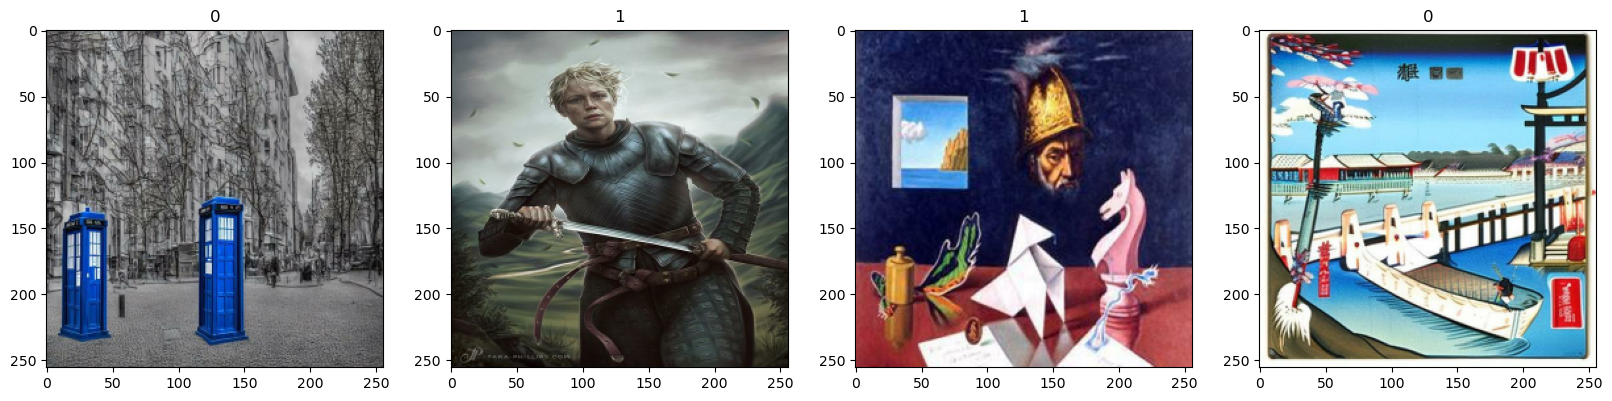

In [18]:
fig, ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx,img in enumerate(batch_scaled[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch_scaled[1][idx])

In [19]:
train_size = int(len(data_scaled)*0.7)
val_size = int(len(data_scaled)*0.2)+1
test_size = int(len(data_scaled)*0.1)+1

In [20]:
train = data_scaled.take(train_size)
test = data_scaled.skip(train_size).take(test_size)
validation = data_scaled.skip(train_size).skip(test_size).take(val_size)

In [21]:
train_it = train.as_numpy_iterator()
(train_it.next()[0])

array([[[[0.4117647 , 0.5294118 , 0.74313724],
         [0.34313726, 0.47254902, 0.6960784 ],
         [0.29411766, 0.43137255, 0.66862744],
         ...,
         [0.23921569, 0.3882353 , 0.7058824 ],
         [0.2372549 , 0.39803922, 0.7117647 ],
         [0.23235294, 0.39313725, 0.7029412 ]],

        [[0.3990196 , 0.50686276, 0.72843134],
         [0.34313726, 0.46960783, 0.6960784 ],
         [0.30588236, 0.44705883, 0.6901961 ],
         ...,
         [0.21862745, 0.36862746, 0.6843137 ],
         [0.20686275, 0.36568627, 0.6754902 ],
         [0.19901961, 0.35882354, 0.66568625]],

        [[0.39117646, 0.49019608, 0.71862745],
         [0.35      , 0.46960783, 0.7029412 ],
         [0.31862745, 0.46372548, 0.7127451 ],
         ...,
         [0.19607843, 0.34117648, 0.65392154],
         [0.20392157, 0.35      , 0.654902  ],
         [0.21176471, 0.35686275, 0.6519608 ]],

        ...,

        [[0.50392157, 0.43333334, 0.38627452],
         [0.47941175, 0.40882352, 0.3617647 ]

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import BatchNormalization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


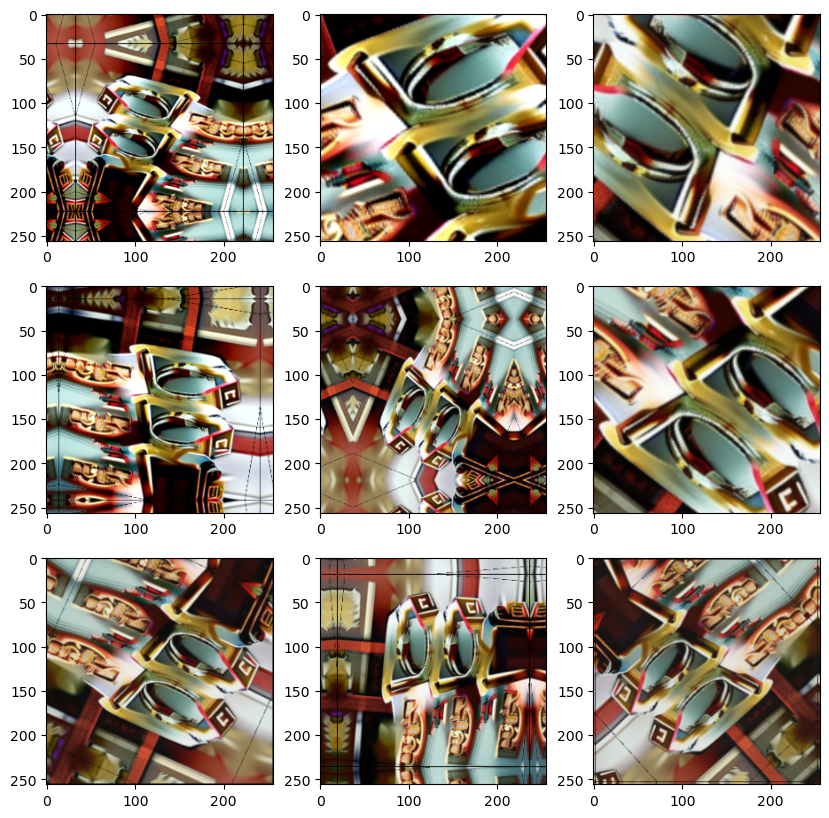

In [23]:
data_aug = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomFlip("vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.4),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.5),
        tf.keras.layers.experimental.preprocessing.RandomContrast(0.2)
    ]
)
plt.figure(figsize=(10,10))
for images , _ in train.take(1):
    for i in range(9):
        augmented_images = data_aug(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[0])

In [24]:
model = Sequential()

In [25]:
"""base_model = VGG16( include_top=False, input_shape=(224, 224, 3))"""

'base_model = VGG16( include_top=False, input_shape=(224, 224, 3))'

In [26]:
"""model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())  # Global average pooling layer

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))"""

"model = Sequential()\n\n# Block 1\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))\nmodel.add(MaxPooling2D((2, 2)))\n\n# Block 2\nmodel.add(Conv2D(128, (3, 3), activation='relu', padding='same'))\nmodel.add(MaxPooling2D((2, 2)))\n\n# Block 3\nmodel.add(Conv2D(256, (3, 3), activation='relu', padding='same'))\nmodel.add(Conv2D(256, (3, 3), activation='relu', padding='same'))\nmodel.add(MaxPooling2D((2, 2)))\n\n# Block 4\nmodel.add(Conv2D(512, (3, 3), activation='relu', padding='same'))\nmodel.add(Conv2D(512, (3, 3), activation='relu', padding='same'))\nmodel.add(MaxPooling2D((2, 2)))\n\n# Block 5\nmodel.add(Conv2D(512, (3, 3), activation='relu', padding='same'))\nmodel.add(Conv2D(512, (3, 3), activation='relu', padding='same'))\nmodel.add(MaxPooling2D((2, 2)))\n\nmodel.add(GlobalAveragePooling2D())  # Global average pooling layer\n\nmodel.add(Dense(4096, activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(4096, activation='relu'))\nm

In [27]:
model.add(data_aug)

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Add more layers with BatchNormalization here

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
"""logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)"""

"logdir = 'logs'\ntensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)"

In [30]:
hist = model.fit(train,epochs=20,validation_data=validation)

Epoch 1/40
407/407 [==============================] - 179s 440ms/step - loss: 0.6547 - accuracy: 0.6294 - val_loss: 0.6653 - val_accuracy: 0.5955
Epoch 2/40
407/407 [==============================] - 168s 414ms/step - loss: 0.5748 - accuracy: 0.7045 - val_loss: 0.5399 - val_accuracy: 0.7345
Epoch 3/40
407/407 [==============================] - 169s 415ms/step - loss: 0.5433 - accuracy: 0.7310 - val_loss: 0.5434 - val_accuracy: 0.7334
Epoch 4/40
407/407 [==============================] - 168s 413ms/step - loss: 0.5195 - accuracy: 0.7488 - val_loss: 0.5364 - val_accuracy: 0.7253
Epoch 5/40
407/407 [==============================] - 169s 415ms/step - loss: 0.4881 - accuracy: 0.7733 - val_loss: 0.6570 - val_accuracy: 0.6101
Epoch 6/40
407/407 [==============================] - 165s 405ms/step - loss: 0.4708 - accuracy: 0.7836 - val_loss: 0.4725 - val_accuracy: 0.7965
Epoch 7/40
407/407 [==============================] - 164s 403ms/step - loss: 0.4431 - accuracy: 0.7987 - val_loss: 0.5892 -

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)       

In [32]:
def pred_img(img):
    im = cv2.imread(img)
    resize = tf.image.resize(im,(256,256))
    yhat = model.predict(np.expand_dims(resize/255,0))
    print(yhat)
    if (yhat >= 0.5):
        print("Real")
    else:
        print("Ai Generated")

In [33]:
pred_img("test1.png") #AI

[[0.18193813]]
Ai Generated


In [34]:
pred_img("test2.jpeg") #Real

[[0.8993716]]
Real


In [35]:
pred_img("test3.jpg") #Real

[[0.7777728]]
Real


In [36]:
pred_img("Test4.png") # Real

[[0.9228318]]
Real


In [37]:
pred_img("test5.jpg") # Real

[[0.8964968]]
Real


In [38]:
pred_img("test6.png") #AI

[[0.92310077]]
Real


In [39]:
pred_img("test7.png") #AI

[[0.86297375]]
Real


In [40]:
pred_img("test8.png") #AI

[[0.2509019]]
Ai Generated


In [41]:
pred_img("test9.jpg") 

[[0.99034566]]
Real


In [42]:
pred_img("test10.jpg") 

[[0.92417705]]
Real


In [43]:
pred_img("test11.jpg") 

[[0.9902637]]
Real


In [44]:
pred_img("test12.jpg") 

[[0.9377126]]
Real


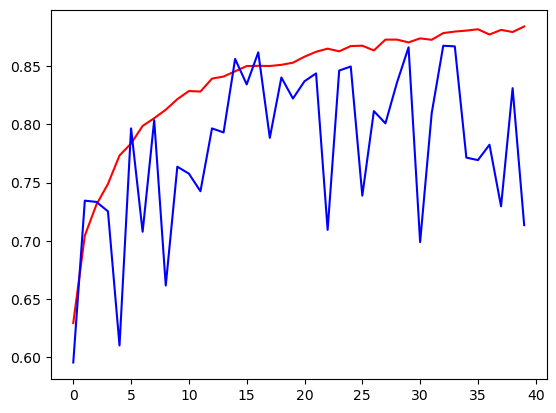

In [45]:
fig  = plt.figure()
plt.plot(hist.history["accuracy"],color='red')
plt.plot(hist.history["val_accuracy"],color='blue')
plt.show()

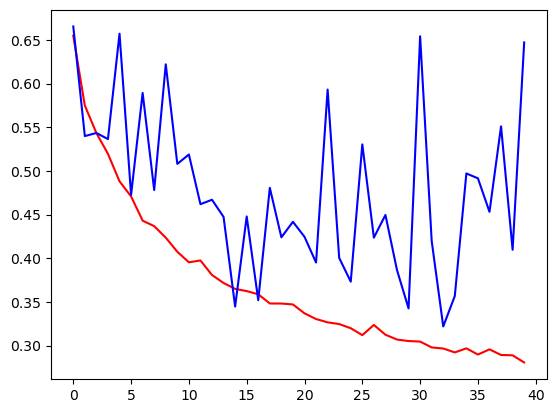

In [46]:
fig  = plt.figure()
plt.plot(hist.history["loss"],color='red')
plt.plot(hist.history["val_loss"],color='blue')
plt.show()

In [47]:
from tensorflow.keras.metrics import  Precision,BinaryAccuracy,Recall
pre = Precision()
ba = BinaryAccuracy()
Re = Recall()

In [48]:
for i in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    ba.update_state(y,yhat)
    Re.update_state(y,yhat)

In [49]:
pre.result().numpy()

0.72727275

In [50]:
ba.result().numpy()

0.71875

In [51]:
Re.result().numpy()

0.5714286

In [52]:
#model.save('my_model.keras')